In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

kmeans algorithm
1. initialize cluster centers randomly
2. assign points to clusters using euclidean distance metric
3. recalculate cluster centers
4. repeat steps 2 and 3 until convergence

In [2]:
# read the input data
data = pd.read_csv("../input/xclara/xclara.csv")
print(data.head())
print(data.shape)

          V1         V2
0   2.072345  -3.241693
1  17.936710  15.784810
2   1.083576   7.319176
3  11.120670  14.406780
4  23.711550   2.557729
(3000, 2)


The dataset has 3000 data points which 2 features each.

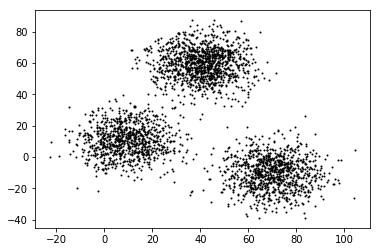

In [3]:
# plot the data points
X = data.values
plt.scatter(X[:, 0], X[:, 1], c='black', s=1)
plt.show();

Looking at the dataset, it is clear that there are 3 distinct clusters. Let's set K = 3 (# clusters)

In [11]:
# choose the number of clusters and the initial cluster centers randomly
k = 3 
C = np.random.randint(-20, np.max(X)-20, size=(k, 2))
print(f"C:{C}")

C:[[ 5 40]
 [28 70]
 [75 45]]


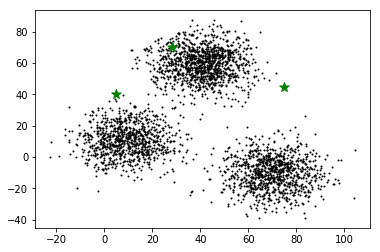

In [12]:
# plot the data points and the initial cluster locations
plt.scatter(X[:, 0], X[:, 1], c='black', s=1)
plt.scatter(C[:, 0], C[:, 1], c='g', s=100, marker='*')
plt.show();

In [13]:
from sklearn.metrics import pairwise_distances

iter = 0
max_iter = 300 # max iterations that kmeans is allowed to run
while True:
    
    distances = pairwise_distances(X, C, metric='euclidean')
    clusters = np.argmin(distances, axis=1)

    # calculate the new cluster centers
    C_new = np.zeros((k, 2))
    for c in range(k):
        C_new[c] = np.mean(X[clusters == c, :], axis=0)

    iter += 1
    # break loop if k-means has converged or max_iter reached
    if np.allclose(C, C_new) or iter == max_iter:
        break
    C = C_new

Clusters = [[  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]]


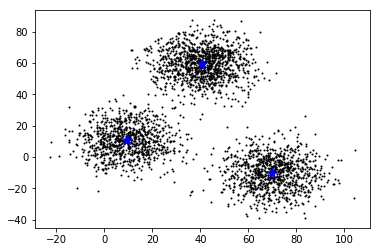

In [15]:
# final clusters are stored in C
print(f"Clusters = {C}")

# print the data points and the final cluster locations
plt.scatter(X[:, 0], X[:, 1], c='black', s=1)
plt.scatter(C[:, 0], C[:, 1], c='blue', s=100, marker='*')
plt.show();

In [ ]:
# plot the clusters in different colors with the cluster centers
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

# plot the data points
for i in range(k):
        samples_ix = np.where(clusters == i)[0]
        ax.scatter(X[samples_ix, 0], X[samples_ix, 1], s=7, c=colors[i])
        
# plot the cluster centers
ax.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='#050505')
plt.show();